In [13]:
import pandas as pd
import matplotlib.pyplot as plotter
import seaborn as sns
import numpy as np

from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
#from tensorflow.keras.callbacks import EarlyStopping
#from tensorflow.keras.utils import to_categorical

#import warnings
#warnings.filterwarnings('ignore')

In [14]:
df = pd.read_csv("diagnosed_cbc_data_v4.csv")
df.head()

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT,Diagnosis
0,10.0,43.2,50.1,4.3,5.0,2.77,7.3,24.2,87.7,26.3,30.1,189.0,12.5,0.17,Normocytic hypochromic anemia
1,10.0,42.4,52.3,4.2,5.3,2.84,7.3,25.0,88.2,25.7,20.2,180.0,12.5,0.16,Normocytic hypochromic anemia
2,7.2,30.7,60.7,2.2,4.4,3.97,9.0,30.5,77.0,22.6,29.5,148.0,14.3,0.14,Iron deficiency anemia
3,6.0,30.2,63.5,1.8,3.8,4.22,3.8,32.8,77.9,23.2,29.8,143.0,11.3,0.12,Iron deficiency anemia
4,4.2,39.1,53.7,1.6,2.3,3.93,0.4,316.0,80.6,23.9,29.7,236.0,12.8,0.22,Normocytic hypochromic anemia


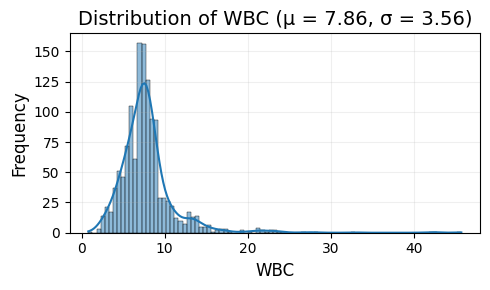

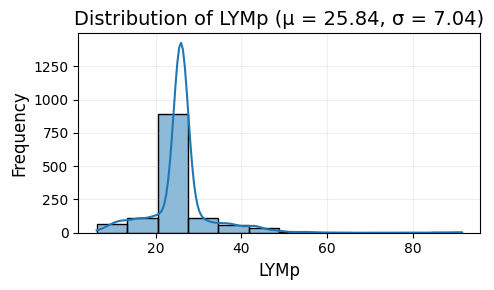

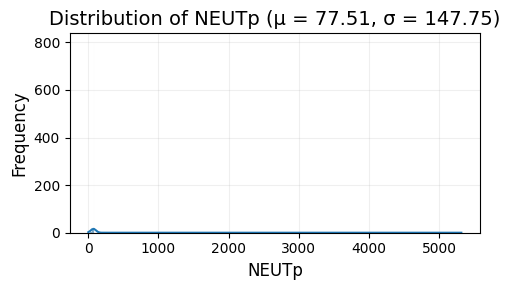

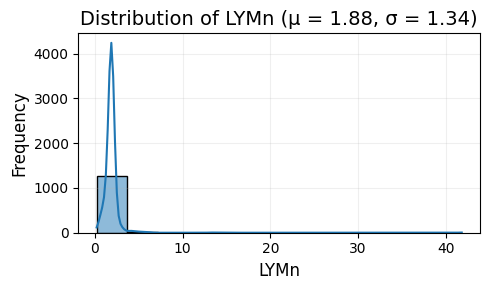

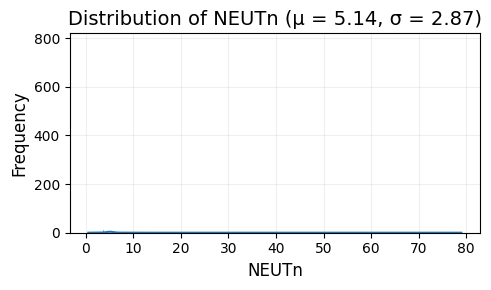

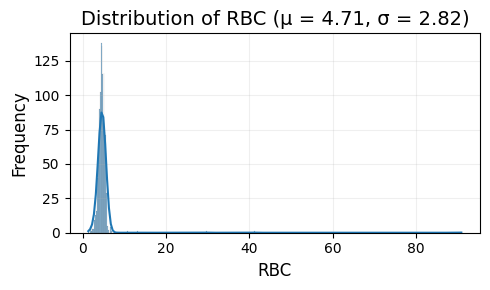

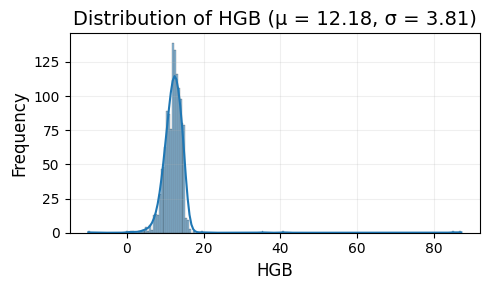

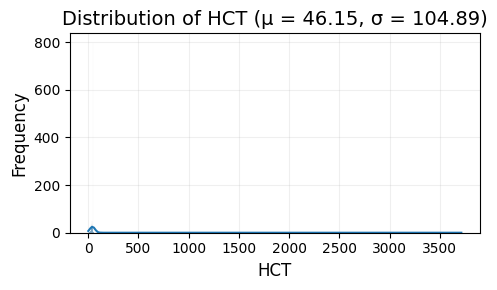

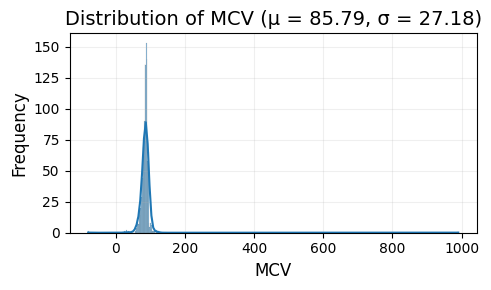

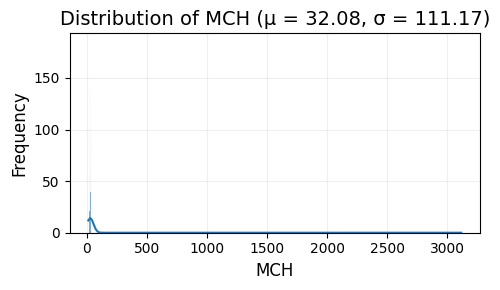

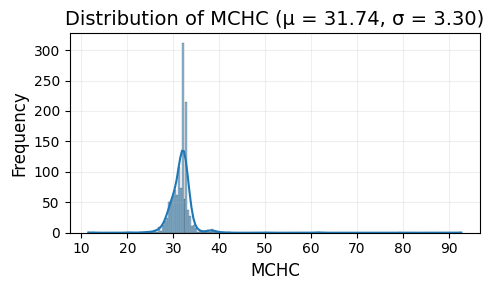

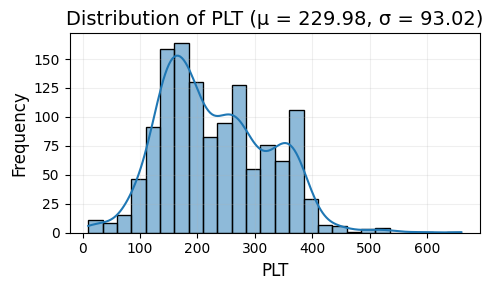

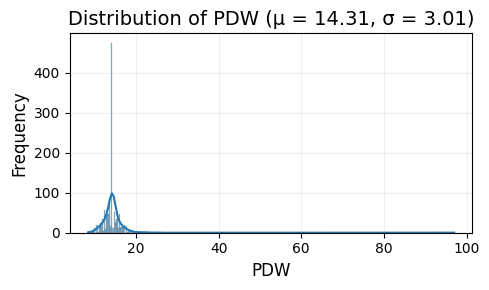

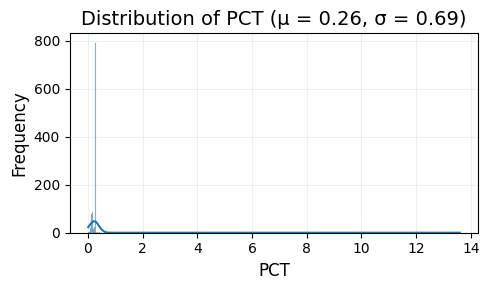

In [15]:
features = df.drop(columns=['Diagnosis'])
for column in features.columns:
    mean = df[column].mean()
    std = df[column].std()
    data_range = np.linspace(df[column].min() - 1, df[column].max() + 1, 1000)
    
    plotter.figure(figsize=(5, 3))
    sns.histplot(df[column], kde=True)  

    plotter.title(f'Distribution of {column} (μ = {mean:.2f}, σ = {std:.2f})', fontsize=14)
    plotter.xlabel(column, fontsize=12)
    plotter.ylabel('Frequency', fontsize=12)
    plotter.grid(alpha=0.2)
    
    plotter.tight_layout()
    # plotter.savefig(f'histogram_{column}.png', dpi=300)
    plotter.show()

**Data description and any cleaning**

In [16]:
df.shape

(1281, 15)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1281 entries, 0 to 1280
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   WBC        1281 non-null   float64
 1   LYMp       1281 non-null   float64
 2   NEUTp      1281 non-null   float64
 3   LYMn       1281 non-null   float64
 4   NEUTn      1281 non-null   float64
 5   RBC        1281 non-null   float64
 6   HGB        1281 non-null   float64
 7   HCT        1281 non-null   float64
 8   MCV        1281 non-null   float64
 9   MCH        1281 non-null   float64
 10  MCHC       1281 non-null   float64
 11  PLT        1281 non-null   float64
 12  PDW        1281 non-null   float64
 13  PCT        1281 non-null   float64
 14  Diagnosis  1281 non-null   object 
dtypes: float64(14), object(1)
memory usage: 150.2+ KB


In [18]:
#checking for missing values
df.isnull().sum()

WBC          0
LYMp         0
NEUTp        0
LYMn         0
NEUTn        0
RBC          0
HGB          0
HCT          0
MCV          0
MCH          0
MCHC         0
PLT          0
PDW          0
PCT          0
Diagnosis    0
dtype: int64

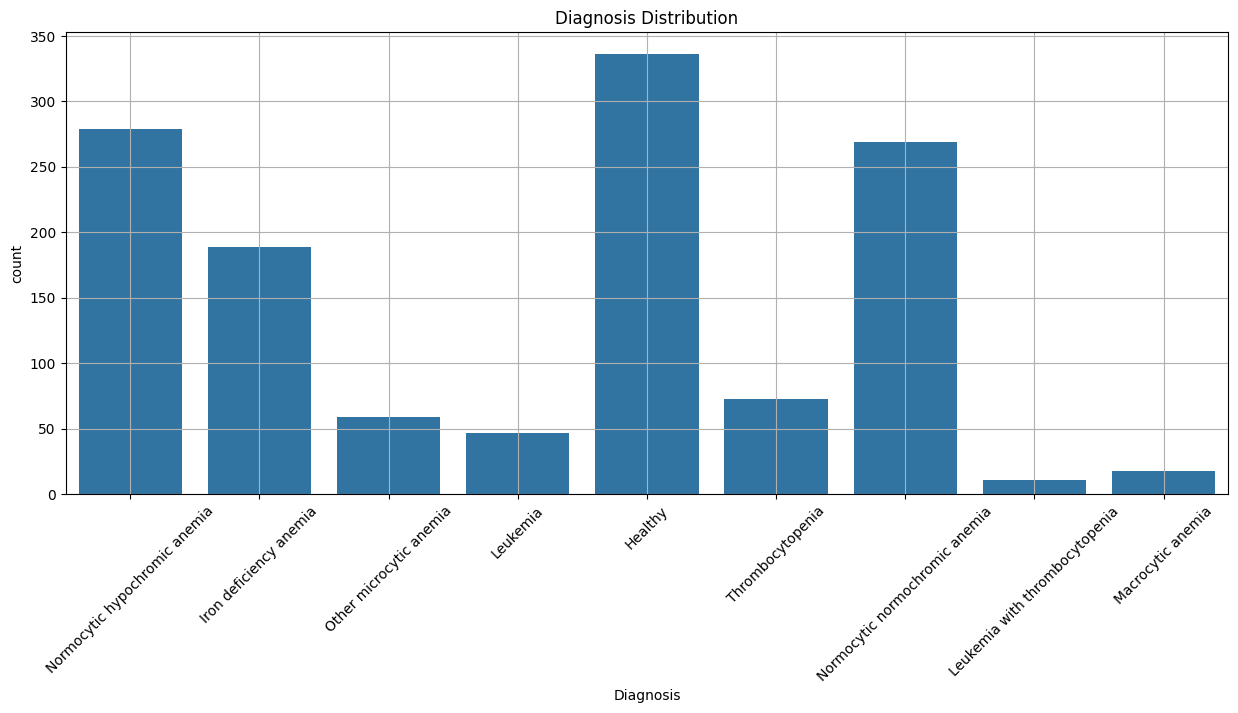

In [19]:
plotter.figure(figsize=(15, 6))
sns.countplot(data=df, x='Diagnosis')
plotter.title('Diagnosis Distribution')
plotter.xticks(rotation=45)
plotter.grid()
plotter.show()

In [20]:
#Using label encoder to convert outcome to binary
le = LabelEncoder()
df['Diagnosis'] = le.fit_transform(df['Diagnosis'])

In [21]:
#We can see which Diagnosis labels are associated with numbers
le.classes_.tolist()

['Healthy',
 'Iron deficiency anemia',
 'Leukemia',
 'Leukemia with thrombocytopenia',
 'Macrocytic anemia',
 'Normocytic hypochromic anemia',
 'Normocytic normochromic anemia',
 'Other microcytic anemia',
 'Thrombocytopenia']

0 = 'Healthy',
1 = 'Iron deficiency anemia',
2 = 'Leukemia',
3 = 'Leukemia with thrombocytopenia',
4 = 'Macrocytic anemia',
5 = 'Normocytic hypochromic anemia',
6 = 'Normocytic normochromic anemia',
7 = 'Other microcytic anemia',
8 = 'Thrombocytopenia'

## Splitting the data into training and testing

In [22]:
X = df.drop(columns = ['Diagnosis'])
y = df['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

# Model Training
Train models, calculate and report accuracy.

Models:
- Decision Tree
- Bagging
- AdaBoost
- XGBoost
- Random Forest.

Decision Tree Accuracy: 0.9805


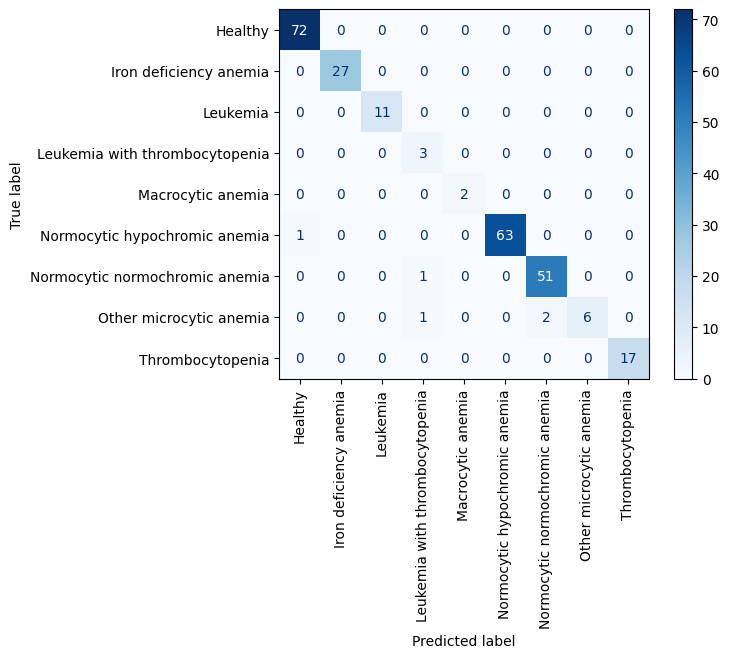

In [23]:
# Decision Tree
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

our_DecisionTree = DecisionTreeClassifier(random_state=1) # Define the classifier
our_DecisionTree.fit(X_train, y_train) # Fit data to the classifier

# Make predictions
tree_predictions = our_DecisionTree.predict(X_test)
predictions_prob = our_DecisionTree.predict_proba(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, tree_predictions)
print(f'Decision Tree Accuracy: {accuracy:.4f}')

cm = confusion_matrix(y_test, tree_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(xticks_rotation='vertical', cmap='Blues')

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Bagging Best Params: {'bootstrap': False, 'max_samples': 0.5, 'n_estimators': 10}
Bagging Accuracy: 0.9844


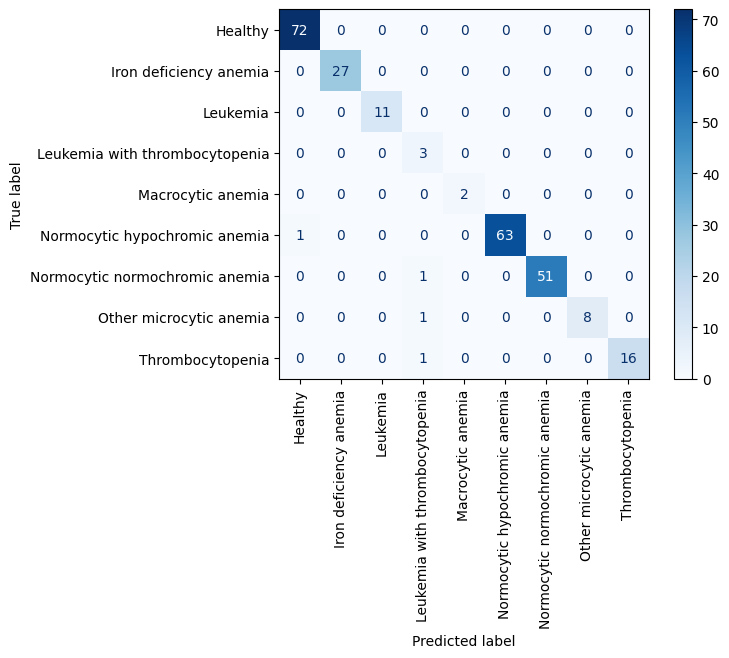

In [24]:
# Bagging with GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV

bag_param_grid = {
    'n_estimators': [10, 29, 50],
    'max_samples': [0.5, 0.8, 1.0],
    'bootstrap': [True, False]
}

base_estimator = DecisionTreeClassifier(random_state=1)
bagging_model = BaggingClassifier(base_estimator, random_state=1)

bag_grid = GridSearchCV(bagging_model, bag_param_grid, cv=3, n_jobs=-1, verbose=1)
bag_grid.fit(X_train, y_train)

bagging_predictions = bag_grid.predict(X_test)
bagging_probabilities = bag_grid.predict_proba(X_test)

accuracy_bag = accuracy_score(y_test, bagging_predictions)
print(f"Bagging Best Params: {bag_grid.best_params_}")
print(f"Bagging Accuracy: {accuracy_bag:.4f}")

cm = confusion_matrix(y_test, bagging_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(xticks_rotation='vertical', cmap='Blues')

Fitting 3 folds for each of 27 candidates, totalling 81 fits
AdaBoost Best Params: {'estimator__max_depth': 3, 'learning_rate': 0.5, 'n_estimators': 50}
AdaBoost Accuracy: 0.9922


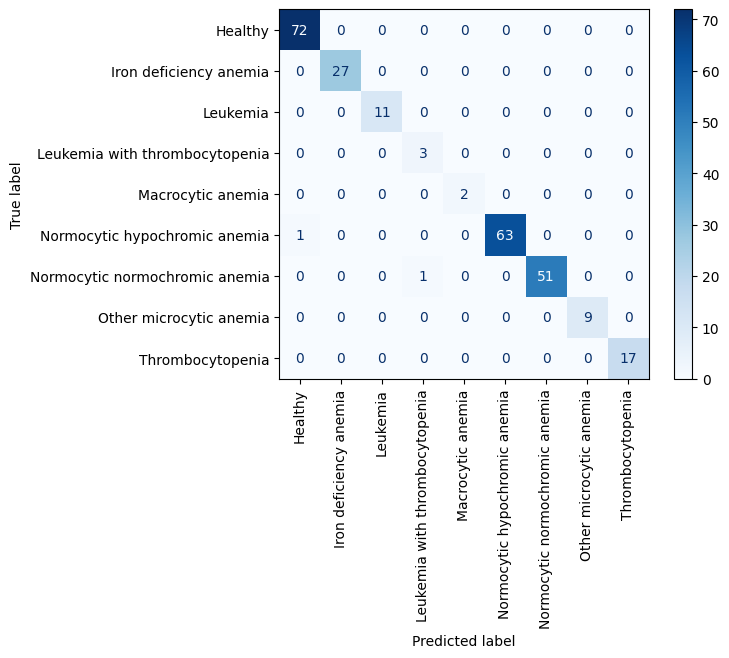

In [25]:
# AdaBoost with GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

ada_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.5, 1.0, 1.5],
    'estimator__max_depth': [1, 2, 3]
}

ada_base = DecisionTreeClassifier(random_state=1)
ada_model = AdaBoostClassifier(estimator=ada_base, random_state=0)

ada_grid = GridSearchCV(ada_model, ada_param_grid, cv=3, n_jobs=-1, verbose=1)
ada_grid.fit(X_train, y_train)

pred = ada_grid.predict(X_test)

accuracy = accuracy_score(y_test, pred)
print(f"AdaBoost Best Params: {ada_grid.best_params_}")
print(f"AdaBoost Accuracy: {accuracy:.4f}")

cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(xticks_rotation='vertical', cmap='Blues')

The model may confuse normocytic hypochromic anemia with healthy cases because the red blood cells are normal in size and symptoms can be mild, making lab values appear similar to those of healthy individuals, but overall the model does a good job.

Fitting 3 folds for each of 27 candidates, totalling 81 fits
XGBoost Best Params: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}
XGBoost Accuracy: 0.9883


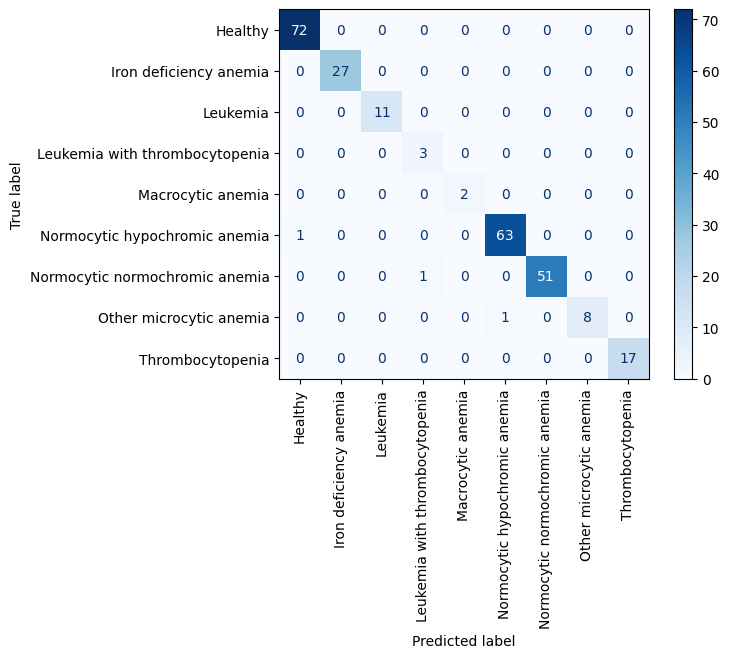

In [28]:
# XGBoost with GridSearchCV
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

xgb_param_grid = {
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2]
}

xgb_model = XGBClassifier(
    random_state=1,
    eval_metric='mlogloss'
)

xgb_grid = GridSearchCV(xgb_model, xgb_param_grid, cv=3, n_jobs=-1, verbose=1)
xgb_grid.fit(X_train, y_train)

xgb_predictions = xgb_grid.predict(X_test)
xgb_probabilities = xgb_grid.predict_proba(X_test)

accuracy = accuracy_score(y_test, xgb_predictions)
print(f"XGBoost Best Params: {xgb_grid.best_params_}")
print(f"XGBoost Accuracy: {accuracy:.4f}")

cm = confusion_matrix(y_test, xgb_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(xticks_rotation='vertical', cmap='Blues')

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Random Forest Best Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Random Forest Accuracy: 0.9844


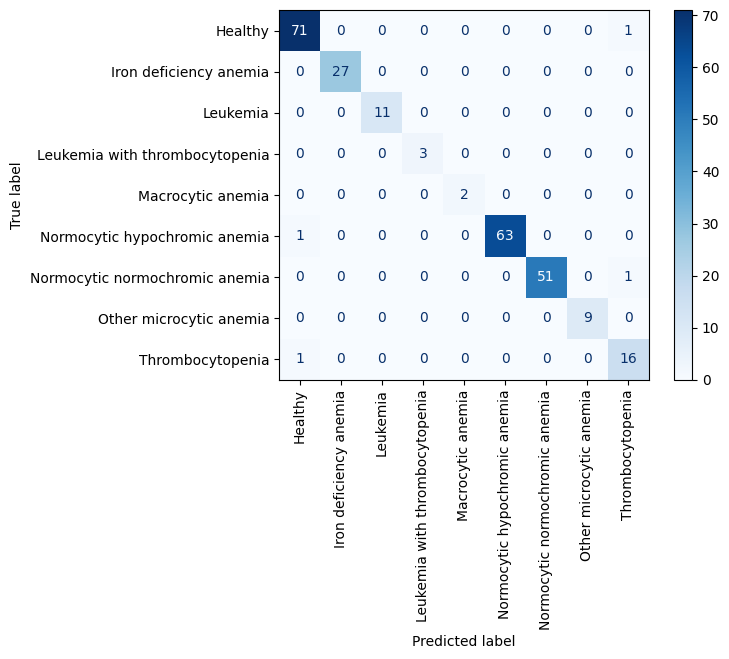

In [27]:
# Random Forest with GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

random_forest_model = RandomForestClassifier(random_state=1)

rf_grid = GridSearchCV(random_forest_model, rf_param_grid, cv=3, n_jobs=-1, verbose=1)
rf_grid.fit(X_train, y_train)

rf_predictions = rf_grid.predict(X_test)
rf_probabilities = rf_grid.predict_proba(X_test)

rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f'Random Forest Best Params: {rf_grid.best_params_}')
print(f'Random Forest Accuracy: {rf_accuracy:.4f}')

cm = confusion_matrix(y_test, rf_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(xticks_rotation='vertical', cmap='Blues')